# Predicting Heart Disease 

Group Number: 65 | Group Members: Claire Rollins, Edward Li, Erika Kuwabara, Jeff Lu

In [1]:
library(tidyverse)
library(repr)
library(tidymodels)
library(ggplot2)
require(reshape2)
options(repr.matrix.max.rows = 6)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ rsample      1.0.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.2     ✔ workflows    1.0.0
✔ modeldata    1.0.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.0     ✔ yardstick    1.0.0
✔ recipes      1.0.1     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks r

## Introduction 

Cardiovascular disease is the leading cause of death worldwide, with an estimated 17.9 million people dying of cardiovascular diseases in 2019. There are many factors that contribute to the cause of these diseases, including age, sex, blood pressure and more (World Health Organization, 2021). As heart disease affects so many people worldwide, it would be useful to have more tools to diagnose it. We will be exploring this using a KNN classification model and a Heart Disease dataset to predict whether or not someone has heart disease.   


We will be working with data collected in 1988 by researchers in Hungary, California, Cleveland and Switzerland. They collected data on 76 attributes they believe contribute to heart disease. We will only be using 14 of them in our data. This data contains 920 rows and 15 columns. 


### Columns:

|Id|Key|Description|
|-|-|-|
|1|age|in years|
|2|sex|male or female|
|3|cp|chest pain type (typical angina, atypical angina, non-anginal pain, or asymptomatic)|
|4|trestbps|resting blood pressure in mmHg|
|5|chol|serum cholesterol in mg/dl|
|6|fbs|fasting blood sugar > 120 mg/dl, true or false|
|7|restecg|resting electrocardiographic results (normal, ST-T wave abnormality, left ventricular hypertrophy)|
|8|thalach|maximum heart rate|
|9|exang|exercise induced angina, true or false|
|10|oldpeak|ST depression induced by exercise|
|11|slope|slope of peak exercise ST segment (upsloping, flat, downsloping)|
|12|ca|number of major vessels coloured by fluoroscopy|
|13|thal|thalassemia, a blood disorder (normal, fixed defect, reversible defect)|
|14|num|heart condition (true or false)|
|15|location|Cleveland, Hungary, Switzerland, California|

Our goal is to answer the question: Can you predict if a patient has heart disease from these collected attributes and if so, compare the accuracy of our model to human doctors to determine if it is reliable for medical use? 

## Preliminary exploratory data analysis

First, we load in the datasets from the web for each of the four locations.

In [2]:
# Load In Each Dataset
cleveland_data <- read.csv("http://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data", header = FALSE, na.strings = "?")
cleveland_data <- mutate(cleveland_data, location = "Cleveland")
cat("\n\nTable 1.1: Unprocessed Heart Data from Cleveland")
cleveland_data

hungarian_data <- read.csv("http://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.hungarian.data", header = FALSE, na.strings = "?")
hungarian_data <- mutate(hungarian_data, location = "Hungary")
cat("\n\nTable 1.2: Unprocessed Heart Data from Hungary")
hungarian_data

switzerland_data <- read.csv("http://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.switzerland.data", header = FALSE, na.strings = "?")
switzerland_data <- mutate(switzerland_data, location = "Switzerland")
cat("\n\nTable 1.3: Unprocessed Heart Data from Switzerland")
switzerland_data

va_data <- read.csv("http://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.va.data", header = FALSE, na.strings = "?")
va_data <- mutate(va_data, location = "California")
cat("\n\nTable 1.4: Unprocessed Heart Data from California")
va_data



Table 1.1: Unprocessed Heart Data from Cleveland

V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,location
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<chr>
63,1,1,145,233,1,2,150,0,2.3,3,0,6,0,Cleveland
67,1,4,160,286,0,2,108,1,1.5,2,3,3,2,Cleveland
67,1,4,120,229,0,2,129,1,2.6,2,2,7,1,Cleveland
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
57,1,4,130,131,0,0,115,1,1.2,2,1,7,3,Cleveland
57,0,2,130,236,0,2,174,0,0.0,2,1,3,1,Cleveland
38,1,3,138,175,0,0,173,0,0.0,1,NA,3,0,Cleveland




Table 1.2: Unprocessed Heart Data from Hungary

V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,location
<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<int>,<int>,<chr>
28,1,2,130,132,0,2,185,0,0,NA,NA,NA,0,Hungary
29,1,2,120,243,0,0,160,0,0,NA,NA,NA,0,Hungary
29,1,2,140,NA,0,0,170,0,0,NA,NA,NA,0,Hungary
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
56,1,4,155,342,1,0,150,1,3,2,NA,NA,1,Hungary
58,0,2,180,393,0,0,110,1,1,2,NA,7,1,Hungary
65,1,4,130,275,0,1,115,1,1,2,NA,NA,1,Hungary




Table 1.3: Unprocessed Heart Data from Switzerland

V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,location
<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<int>,<int>,<chr>
32,1,1,95,0,NA,0,127,0,0.7,1,NA,NA,1,Switzerland
34,1,4,115,0,NA,NA,154,0,0.2,1,NA,NA,1,Switzerland
35,1,4,NA,0,NA,0,130,1,NA,NA,NA,7,3,Switzerland
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
72,1,3,160,0,NA,2,114,0,1.6,2,2,NA,0,Switzerland
73,0,3,160,0,0,1,121,0,0.0,1,NA,3,1,Switzerland
74,1,2,145,0,NA,1,123,0,1.3,1,NA,NA,1,Switzerland




Table 1.4: Unprocessed Heart Data from California

V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,location
<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<int>,<int>,<chr>
63,1,4,140,260,0,1,112,1,3.0,2,NA,NA,2,California
44,1,4,130,209,0,1,127,0,0.0,NA,NA,NA,0,California
60,1,4,132,218,0,1,140,1,1.5,3,NA,NA,2,California
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
55,1,4,122,223,1,1,100,0,0,NA,NA,6,2,California
58,1,4,NA,385,1,2,NA,NA,NA,NA,NA,NA,0,California
62,1,2,120,254,0,2,93,1,0,NA,NA,NA,1,California


We then merge the four datasets seen in Tables 1.1 to 1.4 so we have one single, unified, dataset. This new dataset will be the one we analyze.

In [3]:
# Merge Datasets
raw_data <- rbind(cleveland_data, hungarian_data, switzerland_data, va_data)
cat("\n\nTable 1.5: Full Unprocessed Heart Data")
raw_data



Table 1.5: Full Unprocessed Heart Data

V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,location
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<chr>
63,1,1,145,233,1,2,150,0,2.3,3,0,6,0,Cleveland
67,1,4,160,286,0,2,108,1,1.5,2,3,3,2,Cleveland
67,1,4,120,229,0,2,129,1,2.6,2,2,7,1,Cleveland
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
55,1,4,122,223,1,1,100,0,0,NA,NA,6,2,California
58,1,4,NA,385,1,2,NA,NA,NA,NA,NA,NA,0,California
62,1,2,120,254,0,2,93,1,0,NA,NA,NA,1,California


We rename the columns and factor values to a human-legible form so that we can interpret them.

In [4]:
# Modify Column Names
names(raw_data) <- c("age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal", "num", "location")

# Interpret columns as factors
# Mappings acquired from https://archive.ics.uci.edu/ml/datasets/Heart+Disease
heart_data <- raw_data |> mutate(
    sex = as.factor(sex),
    cp = as.factor(cp),
    fbs = as.logical(fbs),
    restecg = as.factor(restecg),
    exang = as.logical(exang),
    slope = as.factor(slope),
    ca = as.factor(ca),
    thal = as.factor(thal),
    num = as.factor(num > 0)
)

# Solution found online to convert numerial factors to string factors
# https://stackoverflow.com/questions/13613913/how-do-i-convert-certain-columns-of-a-data-frame-to-become-factors
levels(heart_data$sex)<- c("female", "male")
levels(heart_data$cp) <- c("typical angina","atypical angina", "non-anginal pain", "asymptomatic")
levels(heart_data$restecg) <- c("normal","ST-T wave abnormality","hypertrophy")
levels(heart_data$slope) <- c("upsloping","flat","downsloping")
levels(heart_data$thal) <- c("normal", "fixed defect","reversable defect")

# Print out the cleaned data
cat("Table 2.1: Cleaned Heart Data")
heart_data

Table 2.1: Cleaned Heart Data

age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,location
<dbl>,<fct>,<fct>,<dbl>,<dbl>,<lgl>,<fct>,<dbl>,<lgl>,<dbl>,<fct>,<fct>,<fct>,<fct>,<chr>
63,male,typical angina,145,233,TRUE,hypertrophy,150,FALSE,2.3,downsloping,0,fixed defect,FALSE,Cleveland
67,male,asymptomatic,160,286,FALSE,hypertrophy,108,TRUE,1.5,flat,3,normal,TRUE,Cleveland
67,male,asymptomatic,120,229,FALSE,hypertrophy,129,TRUE,2.6,flat,2,reversable defect,TRUE,Cleveland
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
55,male,asymptomatic,122,223,TRUE,ST-T wave abnormality,100,FALSE,0,NA,NA,fixed defect,TRUE,California
58,male,asymptomatic,NA,385,TRUE,hypertrophy,NA,NA,NA,NA,NA,NA,FALSE,California
62,male,atypical angina,120,254,FALSE,hypertrophy,93,TRUE,0,NA,NA,NA,TRUE,California


Next, we remove all invalid data from our dataset. This includes NA values in any column as well as zeros in blood pressure and cholesterol. Since it is not possible for blood pressure and cholesterol to be zero, we remove these from our classification. On the other hand, it is possible for ST depression to be zero, so we keep those in our dataset. 

Since we are dealing with a classification problem, we also remove all non-numerical predictor variables.

In [5]:
# Get the number of rows in the dataset before filtering
num_unfiltered_rows <- nrow(heart_data)

# Get the number of rows which have an NA value
num_na <- heart_data |>
    filter(is.na(age) | is.na(trestbps) | is.na(chol) | is.na(thalach) | is.na(oldpeak)) |>
    nrow()

# Get the number of rows where theres a zero in trestbps or chol.
# It is normal (and expected) to have zeros in oldpeak, so we are keeping those in
num_zero <- heart_data |>
    filter(trestbps == 0 | chol == 0) |>
    nrow()

# Clean the heart data
heart_filtered <- heart_data |>
    filter(!is.na(age) & !is.na(trestbps) & !is.na(chol) & !is.na(thalach) & !is.na(oldpeak)) |>
    filter(trestbps!=0) |>
    filter(chol!=0)

# Get the number of rows after filtertering out the baddies
num_filtered_rows <- nrow(heart_filtered)

cat("\n\nTable 3.1: Statistics of Filtered and Unfiltered Data")
data.frame(
  Key = c("Number of Rows (before filtering)", 
          "Number of NA Values", 
          "Number of (invalid) Zeros", 
          "Number of Rows (after filtering)",
          "Number of Rows Removed"),
  Value = c(num_unfiltered_rows, num_na, num_zero, num_filtered_rows, num_unfiltered_rows-num_filtered_rows)
)

#Select only predictor variables
heart_selected <- heart_filtered |>
    select(num, age, trestbps, chol, thalach, oldpeak)

# Print out the cleaned and filtered data
cat("\n\nTable 3.2: Cleaned and Filtered Heart Data")
heart_selected



Table 3.1: Statistics of Filtered and Unfiltered Data

Key,Value
<chr>,<int>
Number of Rows (before filtering),920
Number of NA Values,93
Number of (invalid) Zeros,172
Number of Rows (after filtering),672
Number of Rows Removed,248




Table 3.2: Cleaned and Filtered Heart Data

num,age,trestbps,chol,thalach,oldpeak
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
FALSE,63,145,233,150,2.3
TRUE,67,160,286,108,1.5
TRUE,67,120,229,129,2.6
⋮,⋮,⋮,⋮,⋮,⋮
TRUE,54,127,333,154,0
TRUE,55,122,223,100,0
TRUE,62,120,254,93,0


After filtering, we see in Table 3.1 that there are 93 rows with NA values and 172 rows with zeros in the blood pressure and cholesterol. Before cleaning, we had 920 rows and after cleaning, we have 672 rows. In total, we removed 248 rows.

First we set a seed value in order to make our work reproducible, as we are choosing random observations in our split. Then, we create the training and testing sets with a 75/25 split. 

In [6]:
# Set the initial seed
set.seed(1000)

# Split into 75% training and 25% testing
heart_split <- initial_split(heart_selected, prop=0.75, strata = num)
heart_training <- training(heart_split)
heart_testing <- testing(heart_split) 

# Print out the training data
cat("Table 4.1: Training Data")
heart_training

Table 4.1: Training Data

,num,age,trestbps,chol,thalach,oldpeak
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
4,FALSE,37,130,250,187,3.5
5,FALSE,41,130,204,172,1.4
6,FALSE,56,120,236,178,0.8
⋮,⋮,⋮,⋮,⋮,⋮,⋮
670,TRUE,54,127,333,154,0
671,TRUE,55,122,223,100,0
672,TRUE,62,120,254,93,0


Below, we a target class distribution table to see how well the data was split (Table 5.1). We note that the two classes are more or less balanced, 238 individuals with heart disease versus 265 without. We then find the average values for each variable for each class (Table 5.2), and see that heart disease patients appear to be older, have lower cholesterol, higher maximum heart rate, and higher ST depression. 

In [13]:
# Create distribution of target class
class_dist <- heart_training |>
    group_by(num) |>
    summarize(n = n(), percent = (n() / nrow(heart_training)) * 100)
cat("\n\nTable 5.1: Class Distribution in Training Data")
class_dist

# Create average values table of each predictor
var_means <- heart_training |>
    group_by(num) |>
    summarize(across(age:oldpeak, mean, na.rm = TRUE))
cat("\n\nTable 5.2: Average values of each predictor in training data")
var_means



Table 5.1: Class Distribution in Training Data

num,n,percent
<fct>,<int>,<dbl>
FALSE,265,52.6839
TRUE,238,47.3161




Table 5.2: Average values of each predictor in training data

num,age,trestbps,chol,thalach,oldpeak
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
FALSE,50.21132,129.7887,242.2566,150.3774,0.3977358
TRUE,55.42017,137.1387,256.2983,131.7143,1.4495798


To decide which predictor variables to use, we graph each of their distributions by class to see if there is a difference between patients that are and are not diagnosed with heart disease.

Using num as id variables

Using num as id variables



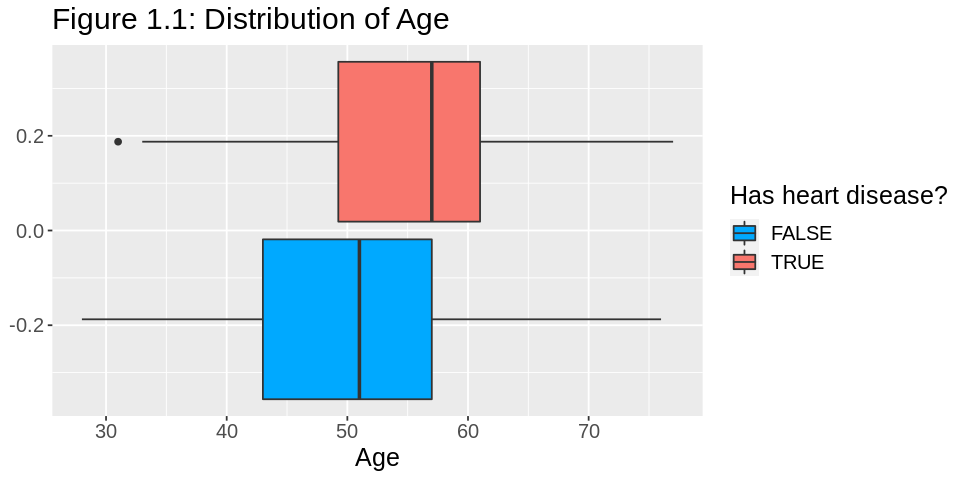

Using num as id variables



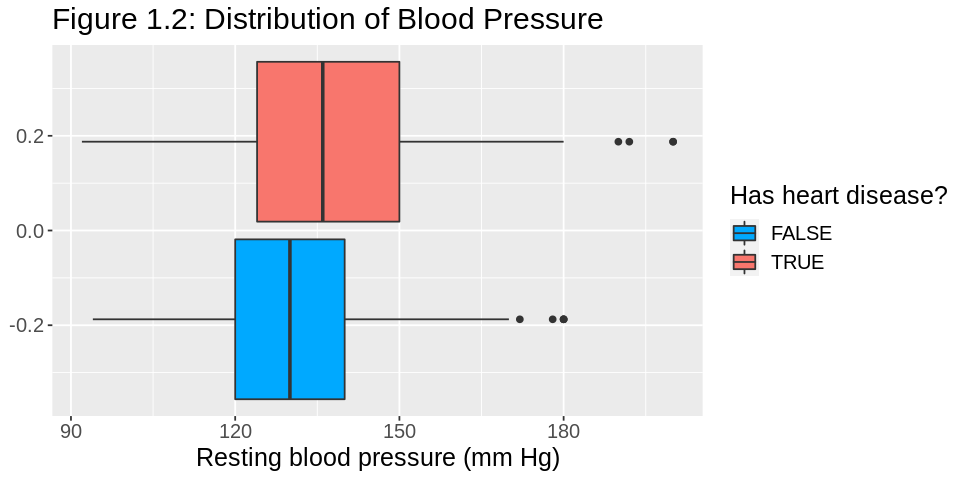

Using num as id variables



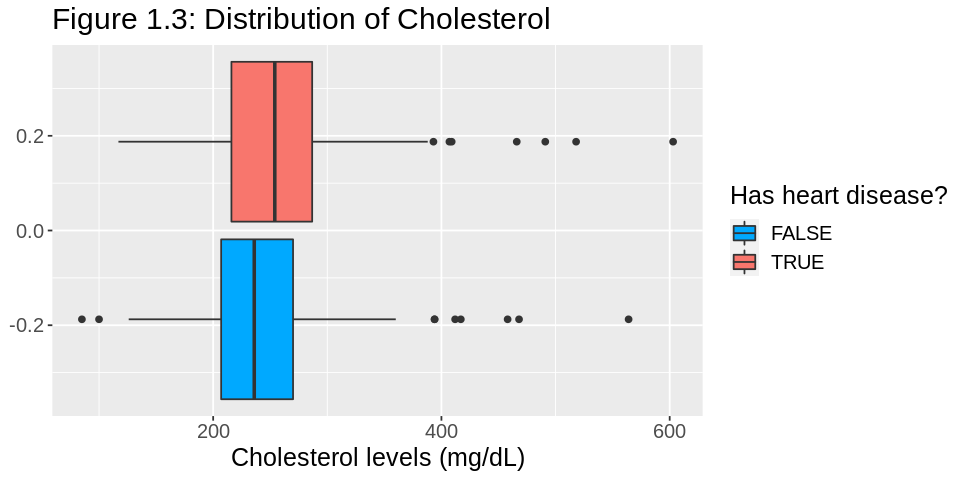

Using num as id variables



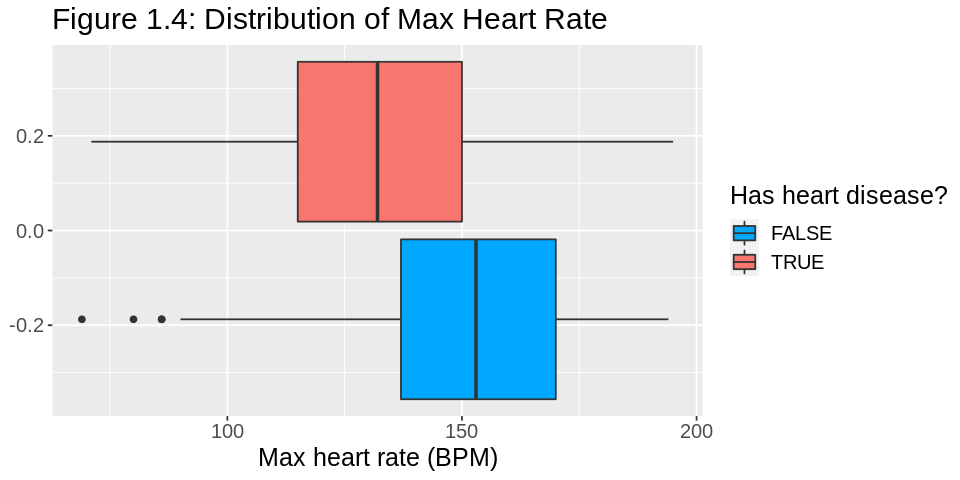

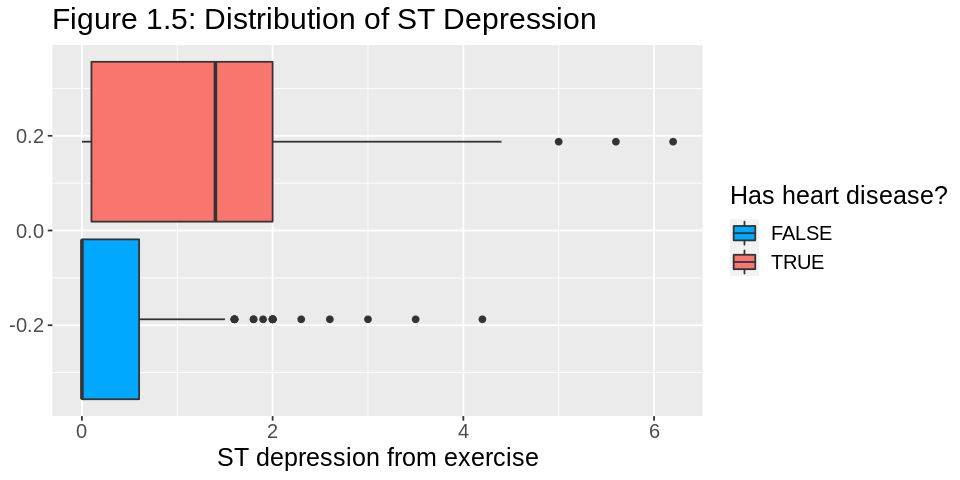

In [8]:
# Set plot options
options(repr.plot.width = 8, repr.plot.height = 4)

# Create charts for the distributions of predictor variables

# Box Plot for Age
age_dist <- heart_training |>
    melt() |>
    filter(variable == "age") |>
    ggplot(aes(x = value, fill = num)) +
        geom_boxplot() +
        theme(text = element_text(size = 15)) +
        labs(x = "Age", fill = "Has heart disease?") +
        scale_fill_manual(values = c("#00A9FF", "#F8766D")) +
        ggtitle("Figure 1.1: Distribution of Age")
age_dist

# Box Plot for Rest BPS
trest_dist <- heart_training |>
    melt() |>
    filter(variable == "trestbps") |>
    ggplot(aes(x = value, fill = num)) +
        geom_boxplot() +
        theme(text = element_text(size = 15)) +
        labs(x = "Resting blood pressure (mm Hg)", fill = "Has heart disease?") +
        scale_fill_manual(values = c("#00A9FF", "#F8766D")) +
        ggtitle("Figure 1.2: Distribution of Blood Pressure")
trest_dist

# Box Plot for Cholestrol
chol_dist <- heart_training |>
    melt() |>
    filter(variable == "chol") |>
    ggplot(aes(x = value, fill = num)) +
        geom_boxplot() +
        theme(text = element_text(size = 15)) +
        labs(x = "Cholesterol levels (mg/dL)", fill = "Has heart disease?") +
        scale_fill_manual(values = c("#00A9FF", "#F8766D")) +
        ggtitle("Figure 1.3: Distribution of Cholesterol")
chol_dist

# Box Plot for Maximum Heart Rate
thalach_dist <- heart_training |>
    melt() |>
    filter(variable == "thalach") |>
    ggplot(aes(x = value, fill = num)) +
        geom_boxplot() +
        theme(text = element_text(size = 15)) +
        labs(x = "Max heart rate (BPM)", fill="Has heart disease?") +
        scale_fill_manual(values = c("#00A9FF","#F8766D")) +
        ggtitle("Figure 1.4: Distribution of Max Heart Rate")
thalach_dist

# Box Plot for ST Depression
oldpeak_dist <- heart_training |>
    melt() |>
    filter(variable == "oldpeak") |>
    ggplot(aes(x = value, fill = num)) +
        geom_boxplot() +
        theme(text = element_text(size = 15)) +
        labs(x = "ST depression from exercise", fill = "Has heart disease?") +
        scale_fill_manual(values = c("#00A9FF", "#F8766D")) +
        ggtitle("Figure 1.5: Distribution of ST Depression")
oldpeak_dist

From the Average Table (Table 5.2) and the Boxplots (Figures 1.1 to 1.5), we conclude that patients with heart disease tend to be older, have lower maximum heart rates, and have higher ST depression. On the other hand, cholesterol and resting blood pressure do not seem particularly good predictors for heart disease since the distributions between patients diagnosed and not diagnosed with heart disease are about the same, so we will not use them.

## Methods 

We will answer our question by creating a classification model using K-nearest neighbors. We are using age, maximum heart rate (thalach) and ST depression (oldpeak) as our predictors for our model. ST depression is a particular outcome that could be shown in an individual’s ECG (electrocardiogram). This occurs when the ‘ST’ segment in a patient’s results appears irregularly low and sits below the baseline (Rowden, 2022). After our preliminary data analysis we created distribution graphs of each of our possible predictor variables (figures 1.1-1.5) and an average values table of all possible predictors (table 5.2) to determine which ones would be best for our model. From these visualizations, we found that these three variables, age, maximum heart rate, and ST depression have the best correlation with the presence of heart disease. 

# Classification and Results

First, we preform a 5-fold cross validation with K values ranging from 1 to 50. We chose a 5-fold cross validation because it gave us a generally good estimate within a reasonable timeframe. We chose a K range of 1 to 50 as that also gives us a broad range of K values while running within a reasonable timeframe.

In [9]:
# Set the seed for KNN
set.seed(1000)

# Create a 5-fold cross validation with K values ranging from 1 to 50
heart_vfold <- vfold_cv(heart_training, v = 5, strata = num)
gridvals <- tibble(neighbors = seq(1, 50))

# Create Recipe for Classification
heart_recipe <- recipe(num ~ age + thalach + oldpeak, data = heart_training) |>
    step_scale(all_predictors()) |>
    step_center(all_predictors())

# Create KNN spec for cross validation to determine K
knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
    set_engine("kknn") |>
    set_mode("classification")

# Get the results from the cross validation
knn_results <- workflow() |>
    add_model(knn_spec) |>
    add_recipe(heart_recipe) |>
    tune_grid(resamples = heart_vfold, grid = gridvals) |>
    collect_metrics() |>
    filter(.metric == "accuracy")

# Display Results
cat("\n\nTable 6.1: Tuning Grid for K")
knn_results



Table 6.1: Tuning Grid for K

neighbors,.metric,.estimator,mean,n,std_err,.config
<int>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,accuracy,binary,0.6798812,5,0.016266980,Preprocessor1_Model01
2,accuracy,binary,0.6779208,5,0.014256532,Preprocessor1_Model02
3,accuracy,binary,0.7176634,5,0.007014039,Preprocessor1_Model03
⋮,⋮,⋮,⋮,⋮,⋮,⋮
48,accuracy,binary,0.7315050,5,0.01274594,Preprocessor1_Model48
49,accuracy,binary,0.7275446,5,0.01210047,Preprocessor1_Model49
50,accuracy,binary,0.7275446,5,0.01210047,Preprocessor1_Model50


Then, we plot a graph of all the K values.

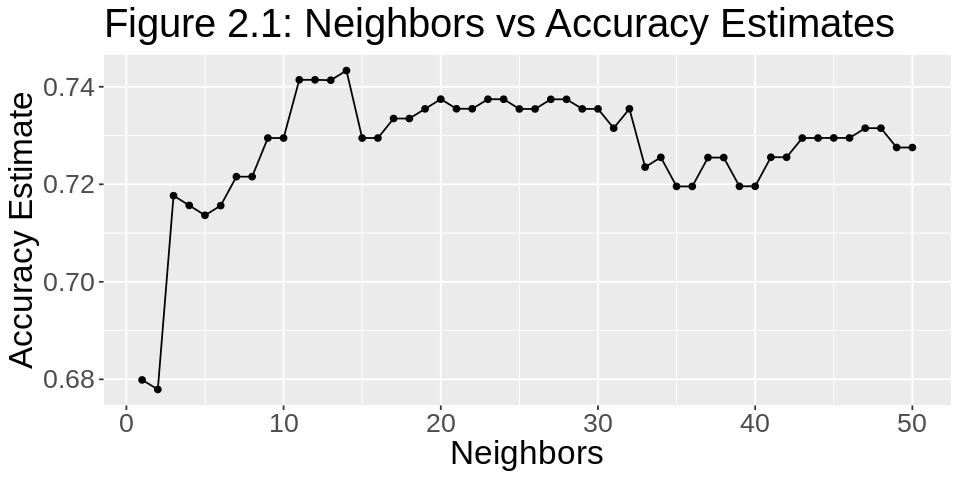

In [10]:
# Create and show a cross plot with K values and Estimate on Accuracy
cross_val_plot <- ggplot(knn_results, aes(x = neighbors, y = mean)) +
    geom_point() +
    geom_line() +
    labs(x = "Neighbors", y = "Accuracy Estimate") +
    theme(text = element_text(size = 20)) +
    ggtitle("Figure 2.1: Neighbors vs Accuracy Estimates")

cross_val_plot

Looking at Figure 2.1, we see a distinct peak at 12 neighbors. We chose this value as our K value for prediction as there is a noticeable peak from 11 to 14. Therefore, we chose the value in the middle since it should provide a more consistent accuracy. Also, the k values around it do not have a drastic drop in accuracy, meaning that 12 neighbors should be a reliable value to choose.

We also chose 12 because it is neither too large or too small, which reduces the chances of overfitting or underfitting.

Below, we proceed with making our k-nn model using 12 neighbors. We then test our model using the testing data, and we find that our model has an accuracy of about 73%. We also find the confusion matrix to see the distribution of true and false positives and negatives, which we later interpret in the analysis.

In [11]:
# Create new KNN spec with 12 neighbors
knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 12) |>
    set_engine("kknn") |>
    set_mode("classification")

# Create workflow
heart_fit <- workflow() |>
    add_model(knn_spec) |> 
    add_recipe(heart_recipe) |>
    fit(heart_training)

# Create predictions with testing data
heart_predictions <- predict(heart_fit, heart_testing) |>
    bind_cols(heart_testing)

# Get accuracy measurement
heart_acc <- heart_predictions |>
    metrics(truth = num, estimate = .pred_class) |>
    filter(.metric == "accuracy") |>
    select(.estimate) |>
    pull()

# Display the accuracy
cat("\n\nPrediction Accuracy:")
heart_acc

# Create and display a confusion matrix for the classification
heart_cm <- heart_predictions |>
    conf_mat(truth = num, estimate = .pred_class)
cat("\n\nTable 7.1: Confusion Matrix for Prediction")
heart_cm



Prediction Accuracy:

[1] 0.7278107



Table 7.1: Confusion Matrix for Prediction

          Truth
Prediction FALSE TRUE
     FALSE    72   29
     TRUE     17   51

Below, we plot each of the three selector variables against each other (i.e. Maximum heart rate vs. age, ST depression vs. Maximum heart rate, and Age vs. ST depression) and see the predicted class for each point in the testing data, resulting in three plots. We do this to check for multicollinearity in our model and to see if we chose our predictor variables for the actual testing data. 

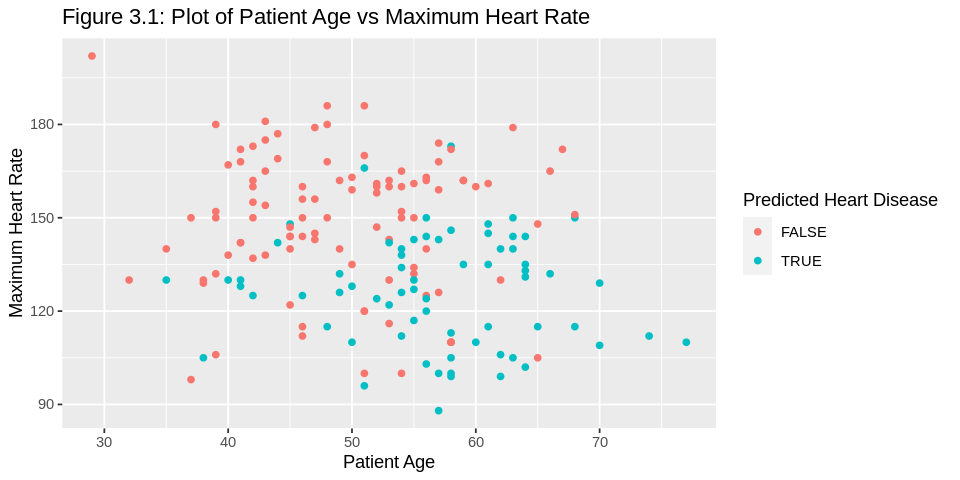

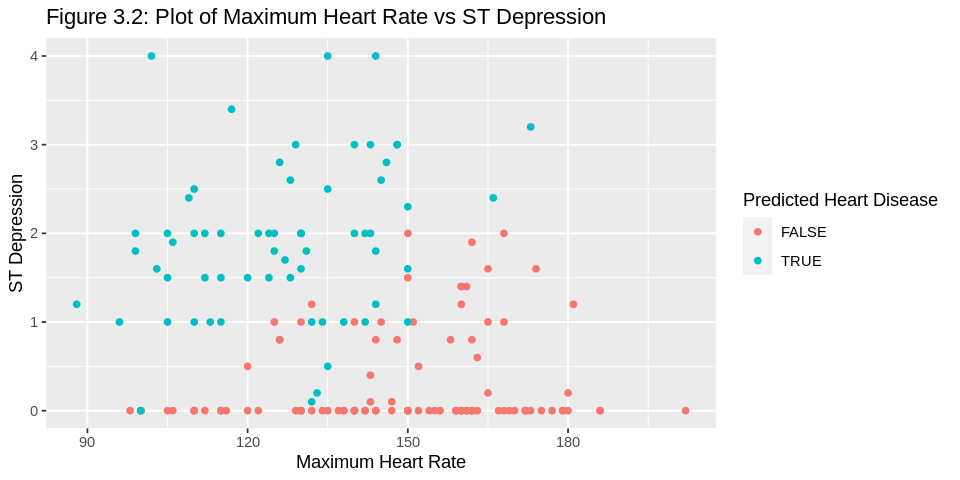

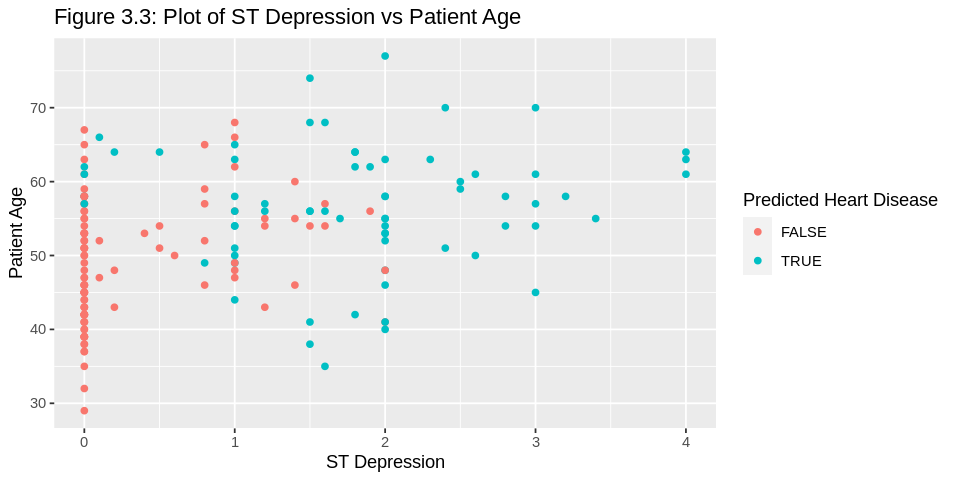

In [14]:
# Create a scatter plot with Age and Maximum Heart Rate
age_thalach_plot <- heart_predictions |> 
    ggplot(aes(x = age, y = thalach, color = .pred_class)) +
    geom_point() + 
    labs(x = "Patient Age", y = "Maximum Heart Rate", color = "Predicted Heart Disease", fill = "Contour Prediction") +
    labs(title = "Figure 3.1: Plot of Patient Age vs Maximum Heart Rate")
age_thalach_plot

# Create a scatter plot with Maximum Heart Rate and ST Depression
thalach_oldpeak_plot <- heart_predictions |>
    ggplot(aes(x = thalach, y = oldpeak, color = .pred_class)) +
    geom_point() + 
    labs(x = "Maximum Heart Rate", y = "ST Depression", color = "Predicted Heart Disease", fill = "Contour Prediction") +
    labs(title = "Figure 3.2: Plot of Maximum Heart Rate vs ST Depression")
thalach_oldpeak_plot

# Create a scatter plot with ST Depression and Age
oldpeak_age_plot <- heart_predictions |> 
    ggplot(aes(x = oldpeak, y = age, color = .pred_class)) +
    geom_point() + 
    labs(x = "ST Depression", y = "Patient Age", color = "Predicted Heart Disease", fill = "Contour Prediction") +
    labs(title = "Figure 3.3: Plot of ST Depression vs Patient Age")
oldpeak_age_plot

# Discussion

After performing our analysis and creating a KNN classification model with our data, we found our model had a 73% accuracy. We also created a confusion matrix (Table 7.1) and found that our model accurately predicted people didn’t have heart disease 81% of the time and accurately predicted people did have heart disease 64% of the time. We also created three scatter plots to help visualize our results. None of the graphs show a linear relationship between our predictor values, meaning there is no multicollinearity between our variables. Therefore, it is easier to determine each predictor’s effect on our model. Figures 3.1-3.3 show a distinct difference between the two classes; therefore, all our predictors fit well with our model. 
    
    
Overall, these are not the results we were expecting to find, as the accuracy of our model is low. We predicted that the accuracy of our model would be higher, so that it could actually be used to predict the presence of heart disease. The recognizable inaccuracy is primarily due to the downloaded dataset’s imperfect measurements or limitations. Medical data are often constricted by smaller sets of observations than what is generally preferred to allow for sufficient training and testing of models built using machine learning algorithms. However, the use of machine learning techniques necessitates the use of large data sets, which are much larger than those typically available from healthcare research experiments, where the observation/sampling sizes are limited by complexity, cost, patient confidentiality, and compliance requirements. This notion can be observed from looking at Table 3.1, where it shows that we had 920 rows before cleaning and only 672 rows after cleaning. This quantitative fact from our model clearly reveals how there is a lot of missing data. It also further proves that the dataset that our model is working with is rather small and it is not representative of a larger population.
    
    
Furthermore, it is challenging to predict heart disease with a higher degree of accuracy with this model because of several underlying associated factors, including diabetes, high blood pressure, high cholesterol, and irregular pulse rate. In other words, heart diseases are trickier to diagnose, as they are very complicated. Thus, small and older datasets like the one at hand are typical in the health industry, since they are sufficient for human comprehension/learning but deficient in volume for machine learning models. Additionally, the lack of centralized medical databases is an aspect that also contributes to the relatively modest quantity of medical data sets available and accessible to the public due to patient privacy rules. Moreover, this retrieved dataset was donated in 1988, which means that the findings in our model using such old information very well may not be as applicable today and lack relevance/validity. This is particularly true for human health, because it is ever-changing and the contributors/risk factors of heart disease can be progressive over time. 
    
    
Since cardiovascular disease is one of the leading causes of mortality worldwide, it would be helpful to have a way to diagnose someone with heart disease quickly (World Health Organization, 2021). These predictive findings can effectively determine exact patterns and relationships associated with heart disease, which could lead to quality improvement of medical services for a ranging demographic. This also makes it worthwhile for patients to self-diagnose or to speculate about heart disease years before any symptoms arise—ultimately saving lives thanks to early intervention. However, it is challenging to identify heart disease due to the multitude of contributory risk factors, as seen from the low accuracy of our model. The accuracy percentile from our model is not what will be applied in practice. The implications of false results suggest that the model would need to be adjusted before it could be considered useful in the medical sector. Otherwise, over half of those diagnosed with some form of heart disease will eventually pass away from the condition without early detection and professional mediation. Hence, to improve the process of diagnosing heart disease, a better model would have to be created. This model would probably take more predictors into account and need higher accuracy.
    
    
We compared our model’s accuracy to the accuracy of a doctor’s diagnosis. A study by Bobbio et al. (1994) asked doctors from three different places to evaluate whether or not 257 patients had coronary artery disease. They found that they predicted a negative test accurately 72% of the time and a positive one 85%. Comparing this study to the results of our confusion matrix (Table 7.1), our model has a higher accuracy when predicting if a patient doesn’t have heart disease. However, when it comes to predicting a positive test result, the doctors from the study are over 20% more accurate than our model.
    
    
From the findings of this inquiry project, the inaccuracy leads to a lot of room for enhancement. Consequently, this can lead to further questions, such as, “How can we then further improve the accuracy of our model?” and “What other factors can we use to predict heart disease?”


## Sources 

Bobbio, M., Fubini, A., Detrano, R., Shandling, A. H., Ellestad, M. H., Clark, J., Brezden, O., Abecia, A., & Martinez-caro, D. (1994). Diagnostic accuracy of predicting coronary artery disease related to patients' characteristics. Journal of Clinical Epidemiology, 47(4), 389–395. https://doi.org/10.1016/0895-4356(94)90160-0 

Cherngs. (2020, March 29). *Heart disease Cleveland UCI.* Kaggle. Retrieved from https://www.kaggle.com/datasets/cherngs/heart-disease-cleveland-uci 

Deshmukh, H. (2020, June 18). *Heart disease UCI-Diagnosis &amp; Prediction - Towards Data Science.* Towards Data Science. Retrieved from https://towardsdatascience.com/heart-disease-uci-diagnosis-prediction-b1943ee835a7 

Detrano, R., Janosi, A., Pfistere, M., & Steinbrunn, W. (1988). *Heart Disease Data Set.* UCI Machine Learning Repository. Retrieved from https://archive.ics.uci.edu/ml/datasets/Heart+Disease

Rowden, A. (2022, July 28). ST depression on ECG: What it means and causes. Medical News Today. Retrieved from https://www.medicalnewstoday.com/articles/st-depression-on-ecg 

World Health Organization. (2021, June 11). *Cardiovascular diseases (cvds).* World Health Organization. Retrieved from https://www.who.int/news-room/fact-sheets/detail/cardiovascular-diseases-(cvds) 